# Step 3: Feature Engineering

In [2]:
# Import modules
import pandas as pd
import numpy as np

In [4]:
yelp_df_business = pd.read_csv('../data/processed_data/preprocessed_business.csv')

In [5]:
yelp_df_business.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"['Local Services', 'Mailbox Centers', 'Notarie...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
1,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","['Department Stores', 'Electronics', 'Fashion'...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."


In [6]:
processed_data = yelp_df_business.copy()
processed_data.shape

(117618, 14)

### Our target variable to define whether a business would be successfull or not can be defined by the stars obtained by respective businesses.



In [7]:
# Here we are adding our target column 
processed_data["success_indicator"] = [1 if x >= 3 else 0 for x in processed_data['stars']]
processed_data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,success_indicator
0,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"['Local Services', 'Mailbox Centers', 'Notarie...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",1
1,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","['Department Stores', 'Electronics', 'Fashion'...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",1
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","['Bakeries', 'Bubble Tea', 'Coffee & Tea', 'Fo...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",1
3,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","['Breweries', 'Brewpubs', 'Food']","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",1
4,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","['Burgers', 'Fast Food', 'Food', 'Ice Cream & ...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",0


In [32]:
processed_data = pd.get_dummies(processed_data, columns = ['state'])
processed_data.columns

Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'success_indicator', 'state_AB',
       'state_AZ', 'state_CA', 'state_CO', 'state_DE', 'state_FL', 'state_HI',
       'state_ID', 'state_IL', 'state_IN', 'state_LA', 'state_MI', 'state_MO',
       'state_MT', 'state_NC', 'state_NJ', 'state_NV', 'state_PA', 'state_SD',
       'state_TN', 'state_TX', 'state_VI', 'state_VT', 'state_WA'],
      dtype='object')

In [33]:
processed_data.head()

,Unnamed: 0,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,...,state_NC,state_NJ,state_NV,state_PA,state_SD,state_TN,state_TX,state_VI,state_VT,state_WA
0,1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,63123,38.551126,-90.335695,3.0,15,...,False,False,False,False,False,False,False,False,False,False
1,2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,85711,32.223236,-110.880452,3.5,22,...,False,False,False,False,False,False,False,False,False,False
2,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,19107,39.955505,-75.155564,4.0,80,...,False,False,False,True,False,False,False,False,False,False
3,4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,18054,40.338183,-75.471659,4.5,13,...,False,False,False,True,False,False,False,False,False,False
4,5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,37015,36.269593,-87.058943,2.0,6,...,False,False,False,False,False,True,False,False,False,False


In [35]:
from datetime import datetime

def operational_hours(hours: dict = None):
    if not hours:
        return None
    operational_seconds = 0
    for day, time in hours.items():
        start_time_str, end_time_str = time.split('-')
        start_time = datetime.strptime(start_time_str, '%H:%M')
        end_time = datetime.strptime(end_time_str, '%H:%M')
        if end_time < start_time:
            operational_seconds += 24*3600 - (start_time - end_time).total_seconds()
        else:
            operational_seconds += (end_time - start_time).total_seconds()
        
    return operational_seconds/3600

In [37]:
import ast
processed_data["hours"] = processed_data["hours"].apply(lambda x: ast.literal_eval(x))
processed_data["operational_hours"] = processed_data["hours"].apply(operational_hours)
processed_data.head()

,Unnamed: 0,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,...,state_NJ,state_NV,state_PA,state_SD,state_TN,state_TX,state_VI,state_VT,state_WA,operational_hours
0,1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,63123,38.551126,-90.335695,3.0,15,...,False,False,False,False,False,False,False,False,False,48.0
1,2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,85711,32.223236,-110.880452,3.5,22,...,False,False,False,False,False,False,False,False,False,100.0
2,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,19107,39.955505,-75.155564,4.0,80,...,False,False,True,False,False,False,False,False,False,94.0
3,4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,18054,40.338183,-75.471659,4.5,13,...,False,False,True,False,False,False,False,False,False,40.0
4,5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,37015,36.269593,-87.058943,2.0,6,...,False,False,False,False,True,False,False,False,False,90.0


In [38]:
processed_data['categories']

0         [' Local Services', ' Mailbox Centers', ' Nota...
1         [' Electronics', ' Fashion', ' Furniture Store...
2         [' Bakeries', ' Bubble Tea', ' Coffee & Tea', ...
3                       [' Breweries', ' Food', 'Brewpubs']
4         [' Fast Food', ' Food', ' Ice Cream & Frozen Y...
                                ...                        
117613                   [' Restaurants', 'Middle Eastern']
117614                    [' Beauty & Spas', 'Nail Salons']
117615    [' Bird Shops', ' Hobby Shops', ' Home & Garde...
117616    [' Bikes', ' Eyewear & Opticians', ' Shopping'...
117617    [' Permanent Makeup', ' Piercing', ' Tattoo', ...
Name: categories, Length: 117618, dtype: object

In [ ]:
processed_data['categories'] = processed_data['categories'].apply(lambda x: sorted(x.split(",")) if x is not None else list())

In [22]:
# Explode the 'Values' column
df_exploded = processed_data.explode('categories')

# Create a pivot table
df_pivot = df_exploded.pivot_table(index='business_id', columns=df_exploded.groupby('business_id').cumcount(), values='categories', aggfunc='first').reset_index()

# Rename the columns
df_pivot.columns.name = None  # Remove the 'Values' label from columns
df_pivot.columns = [f'categories_{i}' for i in df_pivot.columns]  # Rename columns

print(df_pivot)

        categories_business_id  \
0       ---kPU91CF4Lq2-WlRu9Lw   
1       --7jw19RH9JKXgFohspgQw   
2       --8IbOsAAxjKRoYsBFL-PA   
3       --9osgUCSDUWUkoTLdvYhQ   
4       --ARBQr1WMsTWiwOKOj-FQ   
...                        ...   
117613  zzjFdJwXuxBOGe9JeY_EMw   
117614  zznJox6-nmXlGYNWgTDwQQ   
117615  zznZqH9CiAznbkV6fXyHWA   
117616  zzw66H6hVjXQEt0Js3Mo4A   
117617  zzyx5x0Z7xXWWvWnZFuxlQ   

                                             categories_0  
0       [' Food', ' Food Trucks', ' Latin American', '...  
1       [' Dentists', ' General Dentistry', ' Health &...  
2                    [' Italian', ' Restaurants', 'Food']  
3       [' Challenge Courses', ' Escape Games', 'Activ...  
4                    [' Bars', ' Nightlife', 'Wine Bars']  
...                                                   ...  
117613                      [' Restaurants', 'Caribbean']  
117614  [' Coffee & Tea', ' Donuts', ' Restaurants', '...  
117615  [' Cuban', ' Honduran', ' Restaurants', 'Po

In [23]:
df = pd.merge(processed_data, df_pivot, left_on="business_id", right_on="categories_business_id")
df.shape

(117618, 41)

In [24]:
cols = [col for col in df.columns if col.startswith("categories_")]
# print(cols)
df = pd.get_dummies(df, columns = cols)
df.head()

In [ ]:
processed_data.dropna(inplace=True)
processed_data = processed_data[processed_data["operational_hours"] > 0]
features = ["operational_hours", "stars", "review_count"]

In [ ]:
# Load packages
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

number_of_feature_to_select = 2

# Create features and target
X = processed_data[features]
y = processed_data.success_indicator

# Convert to categorical data by converting data to integers
X = X.astype(int)
  
# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = number_of_feature_to_select)
X_kbest_features = chi2_features.fit_transform(X, y)
  
# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 3
Reduced feature number: 2


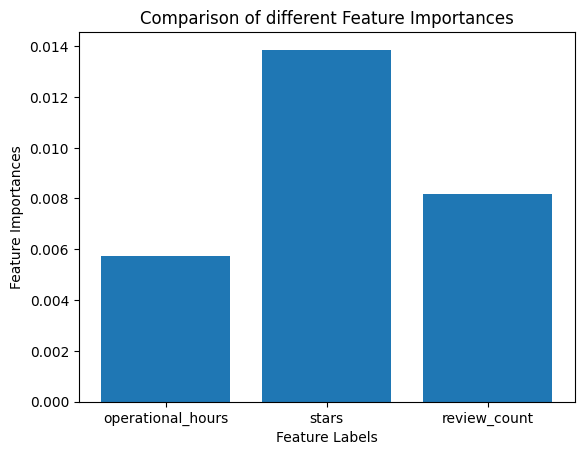

In [ ]:
# Load libraries
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

# Create features and target
X = processed_data[features]
y = processed_data.success_indicator
  
# Convert to categorical data by converting data to integers
X = X.astype(int)
 
 # Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

# Plotting a Bar Graph to compare the models
plt.bar(features, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

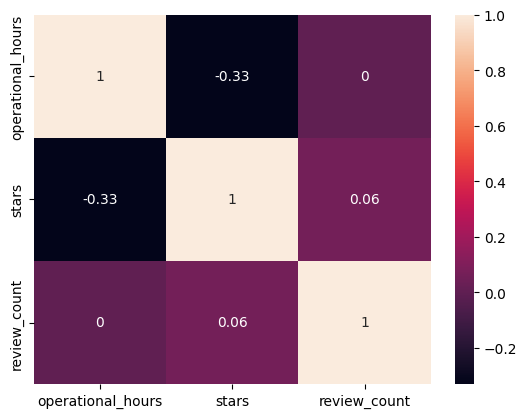

In [ ]:
# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns

#ploting the heatmap for correlation
ax = sns.heatmap(processed_data[features].corr().round(2), annot=True) 

# Data normalization

In [1]:
from sklearn.preprocessing import MinMaxScaler

# scale features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)

# print scaled features
print(scaled_data)

NameError: name 'X' is not defined